# EDA on Lending Club Case Study

**Data Description:** The Data contains the complete loan data for all loans issued through the time period 2007 to 2011. And  the data dictionary which describes the meaning of these variables.

**Business Problem**:

Identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.


**EDA Approach**:

Approach on the EDA on this case study:

**1. Understanding the Data**
   - Import/Load the Data
   - Data info
   - Columns and thier data types
   - Numeric vs Categorical Columns
   - Sanity check
   - **Insights**

**2. Data Quality & Fix**
   - Check and Drop null values
   - delete irrelevant features
   - type cast cat variables
   - Handling outliers
   - check duplicates

**3. Data Content Analysis**
   - Univariate Analysis
   - Bivariate Analysis
   - Correlation b/w features

**4. Derived Features/Metrics**

**5. Inference**


In [60]:
#Importing the needed Liberaries
#import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns #visualization
import matplotlib.pyplot as plt #visualization
import warnings
warnings.filterwarnings("ignore") #Suppress the Future Warnings for a cleaner representation 
import plotly.offline as py#visualization
import plotly.graph_objs as go#visualization

### **1. Understanding the Data**
   - Import/Load the Data
   - Data info
   - Columns and thier data types
   - Numeric vs Categorical Columns
   - Sanity check

In [61]:
#Import/Load the Data
loans = pd.read_csv("loan.csv")
#A quick look into the data
loans.head(3).append(loans.tail(3))

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Data info
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [62]:
# Check Categorical and Numerical variables
pd.value_counts(loans.dtypes)

float64    74
object     24
int64      13
dtype: int64

In [5]:
# See all the columns that contain categorical data
loan_cat_columns = list(loans.select_dtypes(include="object"))
loan_cat_columns

['term',
 'int_rate',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'revol_util',
 'initial_list_status',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d',
 'application_type']

In [6]:
print ("\nMissing values:", loans.isnull().sum().values.sum())
print ("\nUnique values:\n",loans.nunique())


Missing values: 2263364

Unique values:
 id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
                              ...  
tax_liens                         1
tot_hi_cred_lim                   0
total_bal_ex_mort                 0
total_bc_limit                    0
total_il_high_credit_limit        0
Length: 111, dtype: int64


In [63]:
#Sanity check of loan_status
loans.loan_status.value_counts()
#loans.loan_status.shape

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

### Visual analysis of the loan_status

<AxesSubplot:xlabel='loan_status', ylabel='count'>

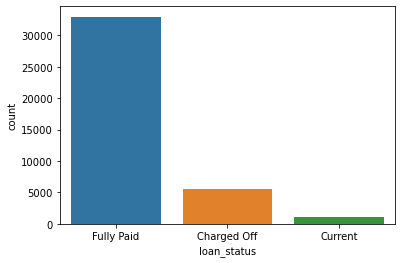

In [64]:
sns.countplot(loans.loan_status)

In [32]:
#labels
lable = loans["loan_status"].value_counts().keys().tolist()
#values
value = loans["loan_status"].value_counts().values.tolist()

trace = go.Pie(labels = lable ,
               values = value ,
               marker = dict(colors =  [ 'green' ,'red', 'blue'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Loan Status Fully Paid vs Default vs Current",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )

data = [trace]
fig = go.Figure(data = data,layout = layout)
py.iplot(fig)

### Insights:

1. There are 111 columns
2. There are many columns with Null values and repeating values and have to be removed for analysis
3. There are 24 object/categorical types, of which few might have to be type casted for analysis. Example: term, int_rate
4. No missing values in the Target variable **loan_status**

### **2. Data Quality & Fix**
   - Check and Drop null values
   - delete irrelevant features
   - type cast cat variables

#### Check and Drop Null

In [95]:
print ("Shape before cleaning the data:", loans.shape)
# Drop if all values are NA, drop that column.
loans_1 =loans.dropna(axis=1,how='all')
print ("Shape after dropping all NA columns:", loans_1.shape)

Shape before cleaning the data: (39717, 111)
Shape after dropping all NA columns: (39717, 57)


#### Delete irrelevant Columns
##### Dropping columns which has same value in all the rows and columns which have data that of not interest
###### Below columns have the same data and we cannot infer any info for this EDA from them

In [96]:
loans_1 = loans_1.drop(['application_type', 'emp_title','collections_12_mths_ex_med', 'desc', 'next_pymnt_d', 'policy_code', 
                        'pymnt_plan', 'title', 'url'],axis=1)
# Below columns are Customer behaviour variables and will not be available @ the time of loan application
# Hence these cannot be used for our EDA
loans_1 = loans_1.drop(['delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 
                        'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
                        'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
                        'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d'],axis=1)
print ("Shape after dropping columns of not interest:", loans_1.shape)

Shape after dropping columns of not interest: (39717, 28)


#### Dropping **rows** that are not of interest in the analysis. 
##### The loan_status 'current' cannot be included for the analysis, as the loan is in progress & No inference can be made out of the Current loan_status

In [97]:
loans_1 = loans_1.drop(loans_1[loans_1['loan_status'] == "Current"].index)
print ("Shape after dropping all not applicable rows:", loans_1.shape)

Shape after dropping all not applicable rows: (38577, 28)


#### Deleting columns with more missing data

<AxesSubplot:>

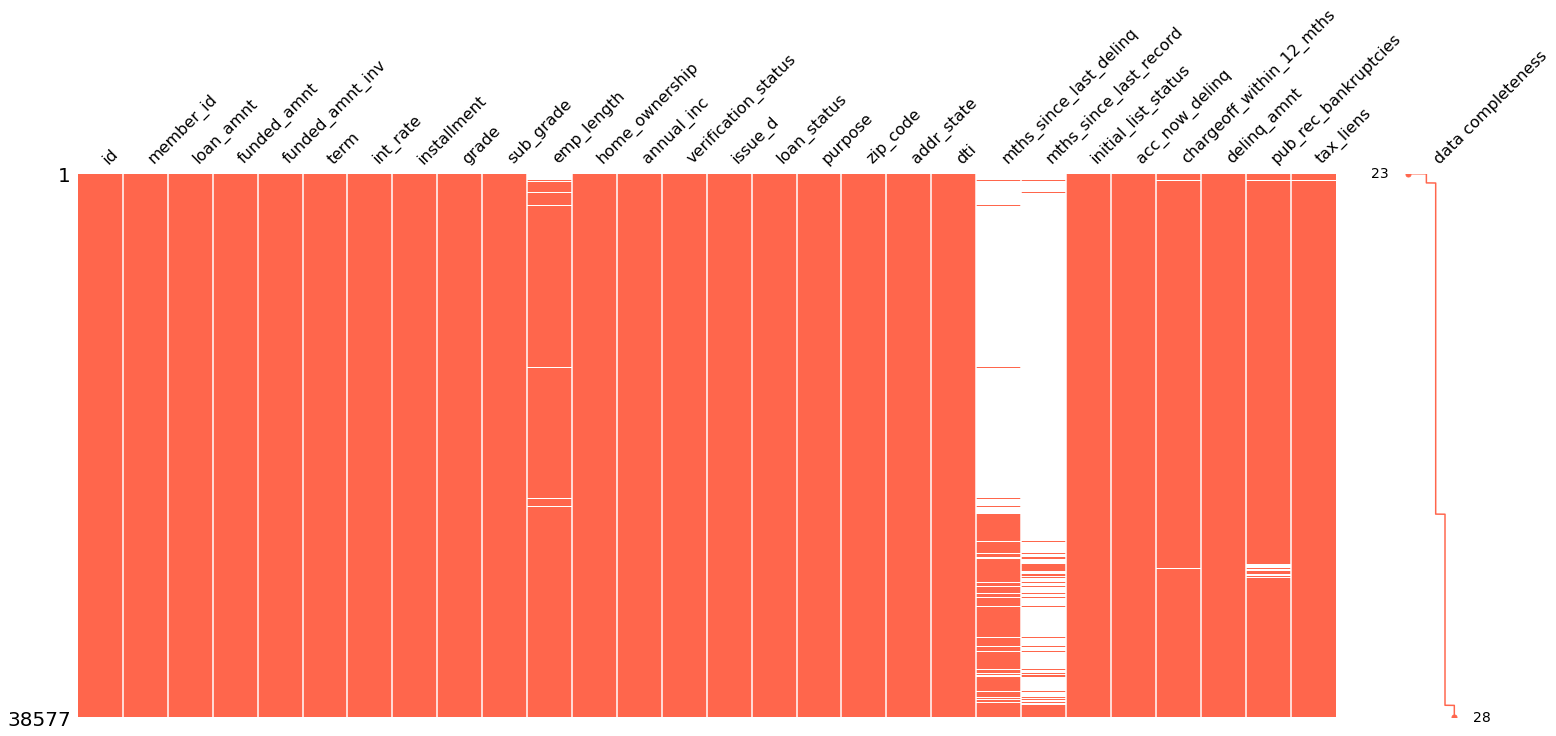

In [98]:
import missingno as msno
%matplotlib inline
msno.matrix(loans_1, labels=True, sort="ascending", color=(1, 0.4, 0.3))

In [99]:
# columns with more than 50 % missing data
missing_columns = loans_1.columns[100*(loans_1.isnull().sum()/len(loans_1.index)) > 50]
print("No. of such columns are:", len(missing_columns))
print(missing_columns)

No. of such columns are: 2
Index(['mths_since_last_delinq', 'mths_since_last_record'], dtype='object')


In [100]:
# Delete the columns that miss more than 50% of values
loans_1 = loans_1.drop(missing_columns, axis=1)
print(loans_1.shape)
print ("Shape after dropping Columns that miss more than 50% data:", loans_1.shape)

(38577, 26)
Shape after dropping Columns that miss more than 50% data: (38577, 26)


<AxesSubplot:>

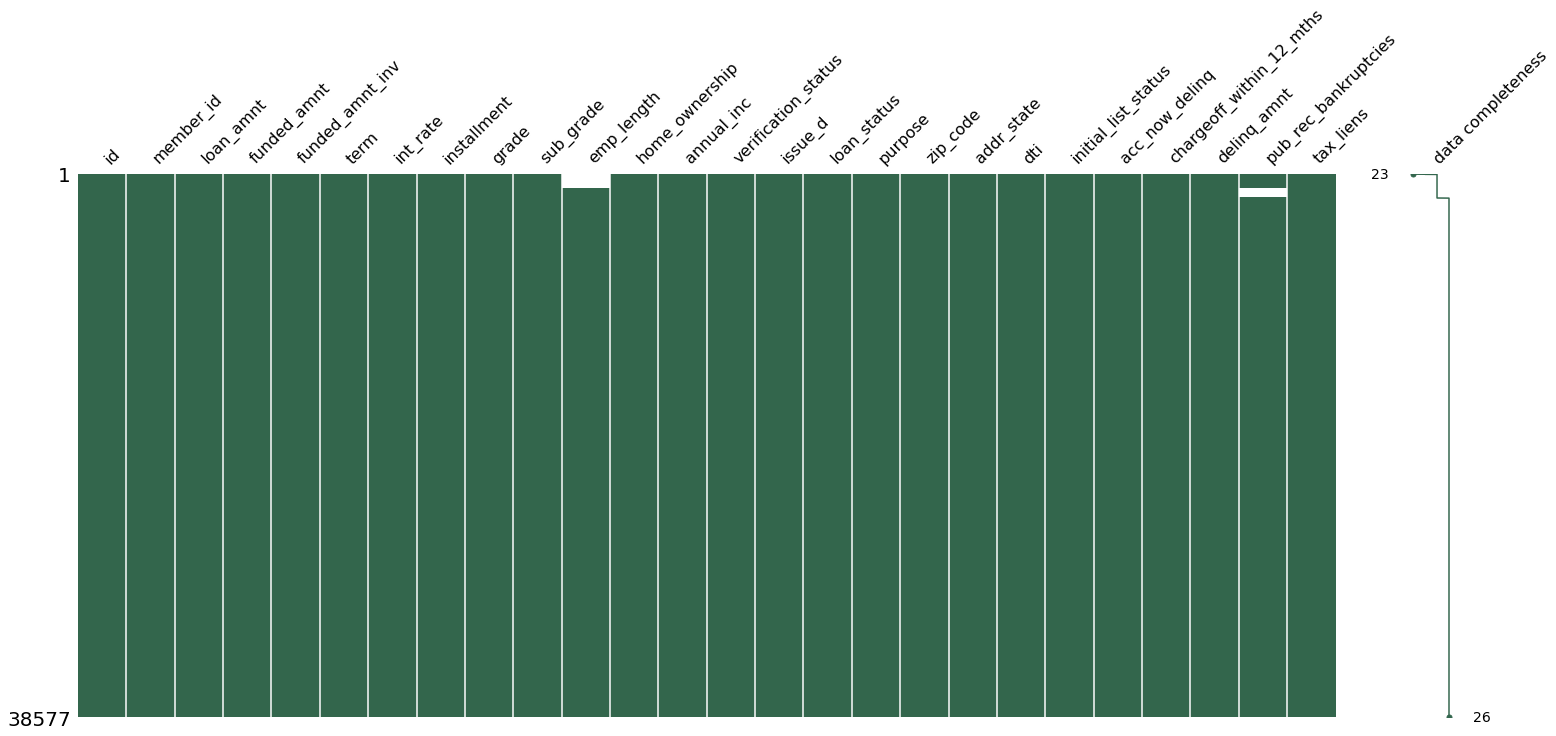

In [101]:
%matplotlib inline
msno.matrix(loans_1, labels=True, sort="ascending", color=(0.2, 0.4, 0.3))

#### Data completeness is better now

### Visual analysis of the loan_status
#### after cleaning the data

In [102]:
#labels
lable = loans_1["loan_status"].value_counts().keys().tolist()
#values
value = loans_1["loan_status"].value_counts().values.tolist()

trace = go.Pie(labels = lable ,
               values = value ,
               marker = dict(colors =  [ 'green' ,'red'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Loan Status Fully Paid vs Default",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )

data = [trace]
fig = go.Figure(data = data,layout = layout)
py.iplot(fig)

### Insights:

1. 54 Columns were Null and were dropped
2. 29 columns were irrelevant for the analysis and were dropped
3. 2 columns had more than 50% data missing and were dropped
4. 1140 rows had data of borrowers whose loan is in Current status and were dropped
5. The Defaulter's/Charged-off % is 14.6%

## Univariant Analysis

- annual_inc
- DTI
- interest_rate
- loan_amnt

#### Cat
- purpose

In [110]:
#loans_1.to_csv('loans_08082022.csv')
loans.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## Bivariant Analysis
### Co-relation
- purpose & loan_status
- State code & loan_status
- grade, sub-grade & loan_status
- verification_status & loan_status
- term & loan_status
- pub_rec_bankruptcies & loan_status
#### Consider the charged_off status only for term, grade, etc


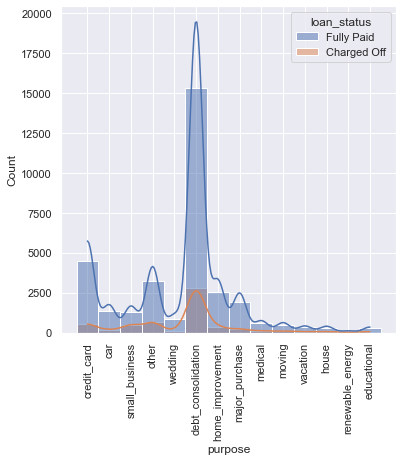

In [109]:
#fig, ax = plt.subplots(figsize=(6, 6))
sns.histplot(x = loans_1.purpose, hue = loans_1.loan_status, kde=True)
sns.set(rc={'figure.figsize':(6,6)})
plt.xticks(rotation=90)
plt.show()

## **4. Derived Features/Metrics**
- Bining of int_rate (0-5, 5-10, 10-15, 15-20, 20-25)
- which two or more variables can be used for derviing a var
- Higher Income more credit risk

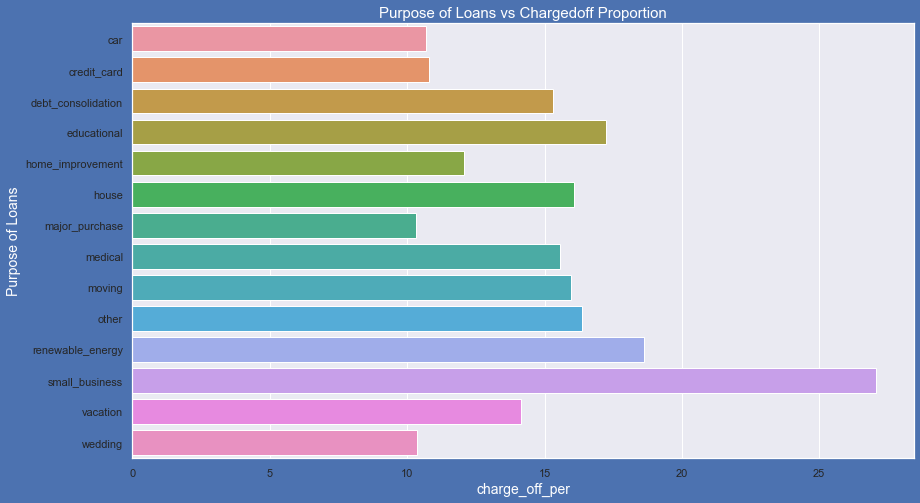

In [113]:
x = loans_1.groupby(['purpose','loan_status'])['loan_status'].count().unstack().reset_index().fillna(0)
x['Total'] = x['Charged Off']+x['Fully Paid']
x['charge_off_per'] = x['Charged Off']/x['Total']*100
fig, ax1 = plt.subplots(figsize=(14, 8),facecolor='b')
ax1.set_title('Purpose of Loans vs Chargedoff Proportion',fontsize=15,color = 'w')
ax1=sns.barplot(y='purpose', x='charge_off_per', data=x)
ax1.set_ylabel('Purpose of Loans',fontsize=14,color='w')
ax1.set_xlabel('charge_off_per',fontsize=14,color = 'w')
plt.show()